## Step 1: Find and download a dataset

In [15]:
# "MRI and Alzheimer's" longitudinal dataset from Kaggle

# https://www.kaggle.com/jboysen/mri-and-alzheimers
# Further information can be found at the OASIS website: https://www.oasis-brains.org/#access
# Original paper Marcus et al with key/legend to columns: https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal

import pandas as pd
data = pd.read_csv("oasis_longitudinal.csv")

## Step 2: Divide into a training set and a testing set

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('Group', axis=1)
y = data['Group']

X_train, y_train, X_test, y_test = train_test_split(X, y, stratify=y)

 ## Step 3: Explore your training set

In [17]:
X_train.info()
y_train.info()
X_train.describe()

# Notes: null values in SES and MMSE columns, low mean years of education

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 64 to 142
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  279 non-null    object 
 1   MRI ID      279 non-null    object 
 2   Visit       279 non-null    int64  
 3   MR Delay    279 non-null    int64  
 4   M/F         279 non-null    object 
 5   Hand        279 non-null    object 
 6   Age         279 non-null    int64  
 7   EDUC        279 non-null    int64  
 8   SES         263 non-null    float64
 9   MMSE        278 non-null    float64
 10  CDR         279 non-null    float64
 11  eTIV        279 non-null    int64  
 12  nWBV        279 non-null    float64
 13  ASF         279 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 32.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 218 to 262
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -----------

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,279.000000,279.000000,279.000000,279.000000,263.000000,278.000000,279.000000,279.000000,279.000000,279.000000
mean,1.867384,593.426523,76.845878,14.594982,2.452471,27.334532,0.281362,1487.974910,0.729810,1.194014
std,0.917639,637.968009,7.618695,2.859562,1.131027,3.718375,0.353111,166.998243,0.036987,0.131459
min,1.000000,0.000000,61.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.909000
25%,1.000000,0.000000,71.000000,12.000000,1.500000,27.000000,0.000000,1360.000000,0.699000,1.107500
50%,2.000000,539.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1475.000000,0.731000,1.190000
75%,2.000000,877.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1584.500000,0.757000,1.291000
max,5.000000,2639.000000,97.000000,23.000000,5.000000,30.000000,2.000000,1931.000000,0.837000,1.587000


## Step 4: Data cleaning

In [18]:
# Get rid of unecessary features: handedness (since all are right handed), MR delay time, Subject ID, MRI ID, Visit number
X_cleaned = X_train.drop(['Hand', 'MR Delay', 'Subject ID', 'MRI ID', 'Visit'], axis=1)

# Drop rows with null/missing values in SES and MMSE columns
X_cleaned = X_cleaned.dropna()
y_cleaned = y_train.dropna()

## Step 5: Visualize the data in your training set

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EDUC', ylabel='Age'>,
        <AxesSubplot:xlabel='SES', ylabel='Age'>,
        <AxesSubplot:xlabel='MMSE', ylabel='Age'>,
        <AxesSubplot:xlabel='CDR', ylabel='Age'>,
        <AxesSubplot:xlabel='eTIV', ylabel='Age'>,
        <AxesSubplot:xlabel='nWBV', ylabel='Age'>,
        <AxesSubplot:xlabel='ASF', ylabel='Age'>,
        <AxesSubplot:xlabel='Visit', ylabel='Age'>,
        <AxesSubplot:xlabel='MR Delay', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='EDUC'>,
        <AxesSubplot:xlabel='EDUC', ylabel='EDUC'>,
        <AxesSubplot:xlabel='SES', ylabel='EDUC'>,
        <AxesSubplot:xlabel='MMSE', ylabel='EDUC'>,
        <AxesSubplot:xlabel='CDR', ylabel='EDUC'>,
        <AxesSubplot:xlabel='eTIV', ylabel='EDUC'>,
        <AxesSubplot:xlabel='nWBV', ylabel='EDUC'>,
        <AxesSubplot:xlabel='ASF', ylabel='EDUC'>,
        <AxesSubplot:xlabel='Visit', ylabel='EDUC'>,
        <AxesSubplot:xl

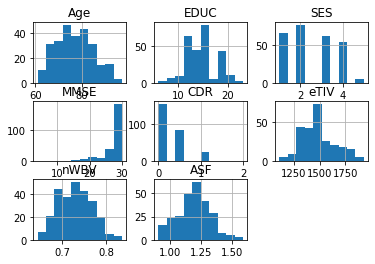

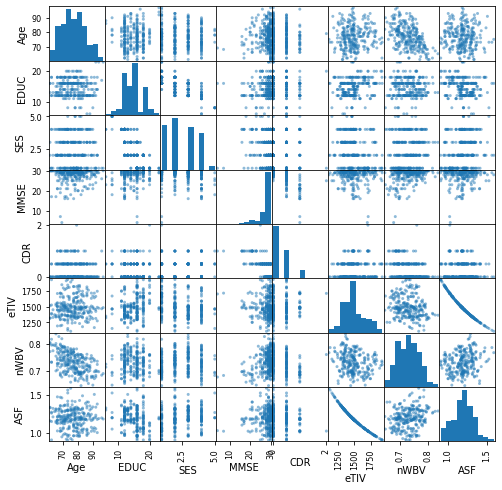

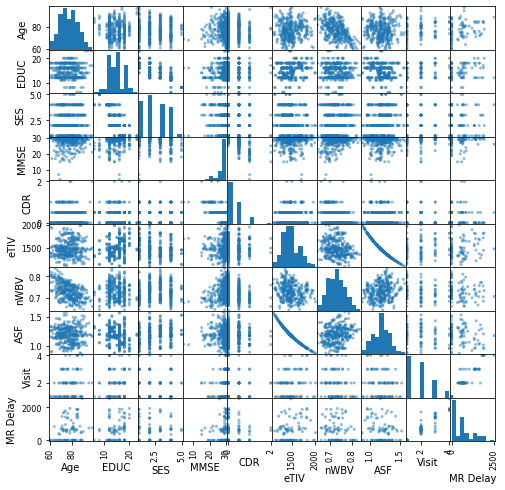

In [19]:
# Basic frequency histograms for each feature. We see MMSE is skewed toward high scores.
X_cleaned.hist()

# Scatter matrix of features with predictor appended
pd.plotting.scatter_matrix(X_cleaned, figsize=(8,8))
cleaned_appended = X_cleaned.append(y_cleaned)
pd.plotting.scatter_matrix(cleaned_appended, figsize=(8,8))

# Heatmap of correlations
#import seaborn
#seaborn.heatmap(cleaned_appended, vmin=-1, vmax=1, annot=True)